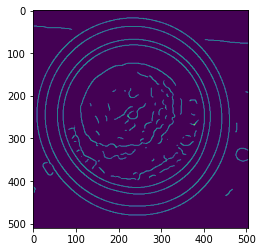

circle: 1
center has coordinate (232,242), radius = 224


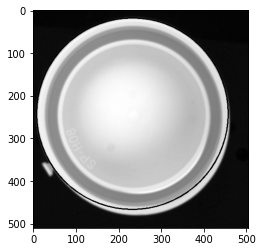

In [21]:
import matplotlib.pyplot as plt

from skimage import data, color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter
import cv2
import numpy as np
# Load picture, convert to grayscale and detect edges


img = cv2.imread("./images/d_04.bmp",cv2.COLOR_BGR2GRAY)

image_rgb= img[40:550,145:650]
image_rgb=cv2.GaussianBlur(image_rgb,(9,9),0)

# image_rgb = data.coffee()[0:220, 160:420]
image_gray = color.rgb2gray(image_rgb)
edges = canny(image_gray, sigma=5.0,
              low_threshold=0.5, high_threshold=0.7)

plt.imshow(edges)
plt.show()

ellipses = hough_ellipse (edges, accuracy=25, threshold=100, min_size=100, max_size=120)

circles = cv2.HoughCircles(image_gray, cv2.HOUGH_GRADIENT,1.50,minDist=190,
                                    param1=20,param2=40,minRadius=220,maxRadius=250)

print("circle: {}".format(len(circles)))
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x,y,r) in  circles:
            print("center has coordinate ({},{}), radius = {}".format(x,y,r))
            image_rgb = cv2.circle(image_rgb,(x,y),r,(0,0,255),2)
            # image_rgb = cv2.circle(image_rgb,(x,y),2,(255,0,0),3)# adding the centre of the circle

plt.imshow(image_rgb,cmap="gray")
plt.show()
       